# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# 2. Collect and load data

In [2]:
df=pd.read_csv('bigcity+(3).csv')
df.head(5)

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


Since the column Unnamed:0 has no relevant usage we create a seperate dataframe(df1) without it

In [3]:
df1=df.drop('Unnamed: 0',axis=1)
df1.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# 3. Explore numeric variables - five number summary

In [4]:
df1.info()
# both u and x are numeric 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
u    49 non-null int64
x    49 non-null int64
dtypes: int64(2)
memory usage: 912.0 bytes


#### 5 point summary

In [5]:
df1.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


The 5 point summary is shown above where Minimum values, 25 th quantile, median(50th quantile), 75 th quantile and Maximum values are displayed

# 3a. Visualize numeric variables in boxplot and histograms


#### Boxplot of input and output variable

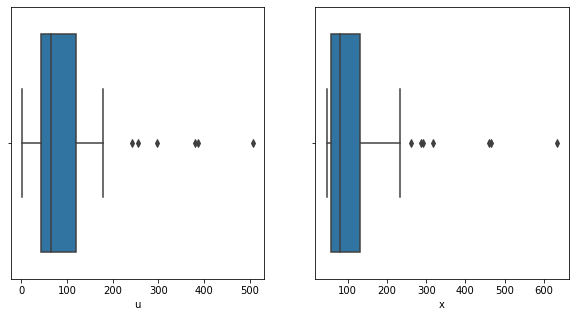

In [17]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(df1['u'],ax=ax[0])
sns.boxplot(df1['x'],ax=ax[1])
plt.show()

#### Histogram of input and output variable

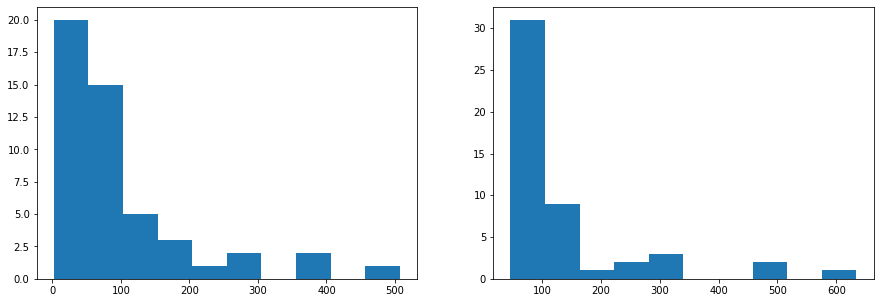

In [6]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.hist(df1['u'],label='u')
ax2.hist(df1['x'],label='x')
plt.show()

# 3b. Measure spread – variance and standard deviation

In [11]:
print('Variance :', df1.var())
print('Standard deviation :',np.std(df1))

Variance : u    10900.416667
x    15158.832483
dtype: float64
Standard deviation : u    103.334211
x    121.858396
dtype: float64


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

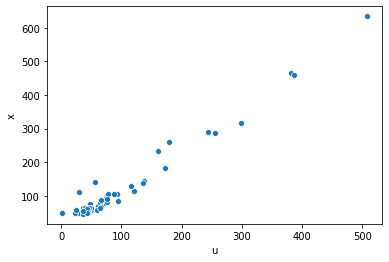

In [52]:
sns.scatterplot(df1['u'],df1['x'])
plt.show()

In [38]:
pd.crosstab(df1['u'],df1['x'],dropna=False).head()

x,46,48,50,52,53,54,57,58,60,61,...,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [55]:
df1.shape

(49, 2)

In [61]:
df1.skew()

u    2.255276
x    2.492902
dtype: float64

There are many outliers seen in both u and x column and also the skewness is high. So, lets transform the columns

In [62]:
df1['u']=np.log(df1['u'])
df1['x']=np.log(df1['x'])

In [63]:
df1.skew()

u   -0.685796
x    1.198172
dtype: float64

In [ ]:
x=df1['u'].values.reshape(-1,1)
y=df1['x']

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [65]:
df1.isnull().sum()
#No missing values

u    0
x    0
dtype: int64

In [66]:
df1.corr()

,u,x
u,1.000000,0.842586
x,0.842586,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [14]:
from sklearn.model_selection import train_test_split
x=df1['u'].values.reshape(-1,1)
y=df1['x']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.2)
print('Xtrain',xtrain.shape)
print('ytrain',ytrain.shape)
print('Xtest',xtest.shape)
print('ytest',ytest.shape)

Xtrain (39, 1)
ytrain (39,)
Xtest (10, 1)
ytest (10,)



# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x=df1['u'].values.reshape(-1,1)
y=df1['x'].values.reshape(-1,1)
mod=lr.fit(xtrain,ytrain)
print('Coefficients :',mod.coef_)
print('Intercepts :',mod.intercept_)

Coefficients : [1.16155798]
Intercepts : 5.662522617269246


In [26]:
slope=mod.coef_
intercept=mod.intercept_
slope,intercept

(array([1.16155798]), 5.662522617269246)

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

Line plot using slope and intercept


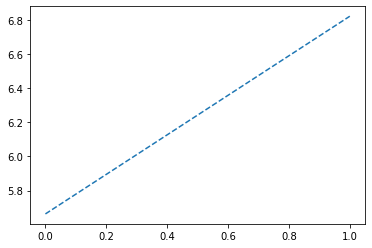

In [29]:
import matplotlib.pyplot as plt 
import numpy as np    

def abline(slope, intercept):
    print('Line plot using slope and intercept')
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
abline(slope,intercept)

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
ypred_train=mod.predict(ytrain.values.reshape(-1,1))
ypred_train=mod.predict(xtrain)
ypred_test=mod.predict(xtest)
rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))
rsquare=mod.score(xtest,ytest)
adj=1-((1-rsquare)*49/(49-2-1))
print('RMSE for test :',rmse_test)
print('Rsquare for test :',rsquare)


RMSE for test : 29.588647721155887
Rsquare for test : 0.7740675938150546


In [18]:
r2_score(xtest,ytest)

0.18219948648595685

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [21]:
print('Accuracy of train data :',mod.score(xtrain,ytrain))

Accuracy of train data : 0.9737243775595024


In [22]:
print('Accuracy of test data :',mod.score(xtest,ytest))

Accuracy of test data : 0.7740675938150546
